# Final Project | `Skin-Scout`

Batch        : FTDS-BSD-006

Group        : 3

Team members : 
- Achmad Abdillah Ghifari : Data Analyst
- Celine Clarissa         : Data Scientist
- Evan Juanto             : Data Engineer

Hugging Face     : [Skin-Scout Deployment Link](https://huggingface.co/spaces/celineclarissa/Skin-Scout)

Original Dataset : [Original Dataset Link](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data)

Team GitHub      : [GitHub Link](https://github.com/FTDS-assignment-bay/p2-final-project-ftds-006-bsd-group-006)

---
---

## i. Introduction

Before we start loading the data, we must define the background and problem statement that can help us answer the problems in the data. In this introduction part, the background will explain why we are using this dataset and the problem statement will explain what problem we want to solve in the data.

### i.1. Background

The current skincare market is flooded with countless products each with unique ingredients and highlights. Consumers often struggle to decide which product most consumer recommend due to the large amount of reviews for each different products, making reading to all the review traditionally wasting too much time and effort. While other metrics such as star rating is present on most skincare website, relying on only star rating to rate the quality of a product is unreliable as research has shown that star rating has many problem such as negativity bias where one negative aspect could lead to users leading a low star despite excelling in other area and also sometime the review and star a user give has discreptancy with some research finding only a moderate correlation between review and star rating. Hence, consumers are left to go through multiple reviews in order to get an accurate insight regarding certain skincare product. Due to this factor our teams goal is to create an application where we could make this process easier by finding out whether a certain user will recommend or not recommend a product based on their review.

### i.2. Problem Statement and Objective

We want to create an application that utilizes Natural Language Processing (NLP) and a recommender system in order to help predict whether a customer will recommend a product or not and also to give recommendation of similar skincare product. Our goal is to create a model with an F1-Score of 80%. This is done by using model such as SVC and cosine similarity in order to create the model. By creating this model, our objective is to make the process of finding the perfect skincare product more time-efficient and less frustrating.

---
---

## ii. Import Libraries

Before we start the data loading process, we have to import the libraries necessary for the EDA process. The following is the libraries used in the EDA process: 

- we use pandas in order to create the dataframe and also to read the dataset in the form of csv

- np is used to process the arrays

- matplotlib is used to make the plot and graph especially in the EDA section

- wordcloud is used in order to make the wordcloud in the EDA section

- warning is used to ignore warnings in the data

In [3]:
# Import libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

---
---
## iii. Data Loading

The first step is to load the dataset in the form of csv into a dataframe using pandas. Next, we will do some basic data exploration for example checking missing value, finding unique value, create descriptive table, etc.

In [4]:
# loading data
data = pd.read_csv("finalproject_clean.csv")

In [5]:
# checking the first 5 data
data.head(5)

,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,skin_tone,eye_color,...,ingredients,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,secondary_category,tertiary_category,child_count
0,5,1.0,1.0,0,0.0,0,2020-04-05,I’m very impressed with the price and how well...,fair,green,...,"['Water, Butylene Glycol, Glycerin, Sodium Hya...",0,0.0,0.0,0.0,1.0,"['Good for: Dullness/Uneven Texture', 'Hyaluro...",Treatments,Face Serums,0.0
1,5,1.0,1.0,0,0.0,0,2017-11-15,Just picked up this product to replace my curr...,tan,brown,...,"['Diisostearyl Malate, Hydrogenated Polyisobut...",0,0.0,0.0,0.0,1.0,"['allure 2019 Best of Beauty Award Winner', 'C...",Lip Balms & Treatments,Moisturizers,3.0
2,4,1.0,0.0,1,1.0,0,2018-02-16,stops future breakouts from happening! The por...,medium,brown,...,"['Aqua (Water), Niacinamide, Pentylene Glycol,...",0,0.0,0.0,0.0,0.0,"['Vegan', 'Community Favorite', 'Oil Free', 'W...",Treatments,Face Serums,1.0
3,4,1.0,1.0,0,0.0,0,2019-09-12,First positive impression is how smooth and so...,lightMedium,brown,...,"['Water, Glycerin, Alcohol Denat., Dipropylene...",0,0.0,0.0,0.0,0.0,"['allure 2019 Best of Beauty Award Winner', 'C...",Cleansers,Toners,0.0
4,5,1.0,1.0,0,0.0,0,2021-09-03,This smells incredible! It really brightens my...,lightMedium,blue,...,"['Alcohol Denat., Fragrance (Parfum), Benzyl C...",0,0.0,1.0,0.0,1.0,"['Vegan', 'Unisex/ Genderless Scent', 'Woody &...",Wellness,Holistic Wellness,0.0


In [6]:
# Checking the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39929 entries, 0 to 39928
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rating                    39929 non-null  int64  
 1   is_recommended            39929 non-null  float64
 2   helpfulness               39929 non-null  float64
 3   total_feedback_count      39929 non-null  int64  
 4   total_neg_feedback_count  39929 non-null  float64
 5   total_pos_feedback_count  39929 non-null  int64  
 6   submission_time           39929 non-null  object 
 7   review_text               39929 non-null  object 
 8   skin_tone                 39929 non-null  object 
 9   eye_color                 39929 non-null  object 
 10  skin_type                 39929 non-null  object 
 11  hair_color                39929 non-null  object 
 12  product_name              39929 non-null  object 
 13  brand_name                39929 non-null  object 
 14  price_

With this code we can see that there are a total of 39948 data with a total of 32 column in the dataset. We can see that most of the dataset is in the form of object or integer apart from price and review.

In [7]:
# Checking for null value
data.isnull().sum()

rating                      0
is_recommended              0
helpfulness                 0
total_feedback_count        0
total_neg_feedback_count    0
total_pos_feedback_count    0
submission_time             0
review_text                 0
skin_tone                   0
eye_color                   0
skin_type                   0
hair_color                  0
product_name                0
brand_name                  0
price_usd                   0
brand_id                    0
loves_count                 0
reviews                     0
size                        0
variation_type              0
variation_value             0
ingredients                 0
limited_edition             0
new                         0
online_only                 0
out_of_stock                0
sephora_exclusive           0
highlights                  0
secondary_category          0
tertiary_category           0
child_count                 0
dtype: int64

With this code, we can see that there are no null value in the dataset. this means that we dont need to do missing value handling.

In [8]:
# Checking duplicate value
data.duplicated().sum()

0

With this code, we can see that there are no duplicated data. This means that duplicate value handling is not necessary as all data in the dataset is unique.

In [9]:
# Checking the unique value of the data
data.nunique()

rating                          5
is_recommended                  2
helpfulness                   650
total_feedback_count          205
total_neg_feedback_count       89
total_pos_feedback_count      175
submission_time              4518
review_text                 39774
skin_tone                      13
eye_color                       6
skin_type                       4
hair_color                      7
product_name                 1921
brand_name                    138
price_usd                     203
brand_id                      138
loves_count                  1877
reviews                       877
size                          458
variation_type                  6
variation_value               467
ingredients                  1711
limited_edition                 2
new                             2
online_only                     2
out_of_stock                    2
sephora_exclusive               2
highlights                   1379
secondary_category             12
tertiary_categ

With this code we can see the amount of unique value in the dataset. We can see that the data is very varied with the column review text having the same amount of unique value as the data as customer's review are unique.

In [10]:
# Viewing the descriptive table of all numeric data in the dataset
data.describe()

,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd,brand_id,loves_count,reviews,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count
count,39929.000000,39929.000000,39929.000000,39929.000000,39929.000000,39929.000000,39929.000000,39929.000000,3.992900e+04,39929.000000,39929.000000,39929.000000,39929.000000,39929.000000,39929.000000,39929.000000
mean,4.305217,0.867014,0.885686,4.290466,0.930151,3.360315,48.764351,5555.176163,1.085472e+05,2184.454532,0.016905,0.026071,0.107992,0.032357,0.325979,0.772797
std,1.145555,0.339564,0.250971,23.226132,5.589368,19.811174,40.380749,1493.717063,1.707097e+05,2568.650005,0.128917,0.159349,0.310374,0.176950,0.468745,1.257843
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1063.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,0.937500,0.000000,0.000000,0.000000,24.000000,5626.000000,1.666400e+04,557.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,39.000000,6073.000000,4.903200e+04,1356.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,1.000000,3.000000,1.000000,3.000000,62.000000,6234.000000,1.241600e+05,2911.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5.000000,1.000000,1.000000,3158.000000,548.000000,2763.000000,465.000000,8017.000000,1.081315e+06,16118.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000


With this code we can check the descriptive table from all numeric data in the dataset. By looking at the count row we can see the total data in the dataset (which is 39,948). With the mean row we can see the average of each column. The standard deviation column is used to check the spread of the data from the mean. Min and max are used to find the minimum and maximum point of the dataset. And lastly the 25%, 50%, and 75% is used to find the the data in said position.

## iv. Exploratory Data Analysis (EDA) 

After cleaning the data, we will move on to Exploratory Data Analysis. Our main objective in this step is to analyze Sephora's skincare products data to gain a better understanding regarding the skincare products and customers characteristic. We will do so by answering these questions that arise from the objective which include these questions:

1. What words are frequently present in people recommending the product and not recommending the product?
2. Does customer recommendation change throught the years?
3. What is the most common characteristics for Sephora's customers?
4. What is the top 10 cheapest and most expensive skincare product sold at Sephora?
5. How is the distribution of skincare products being marked as favorite? 

### iv.1. Wordcloud of Customers Recommendation

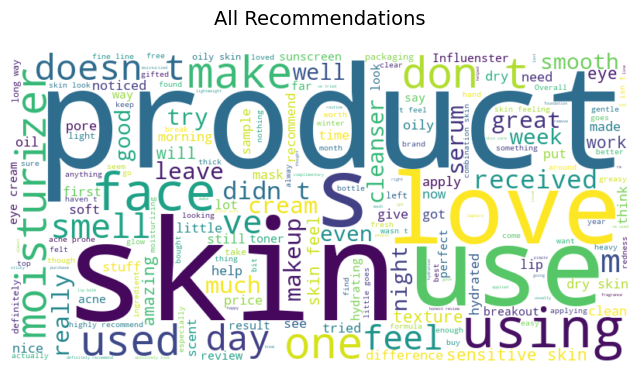

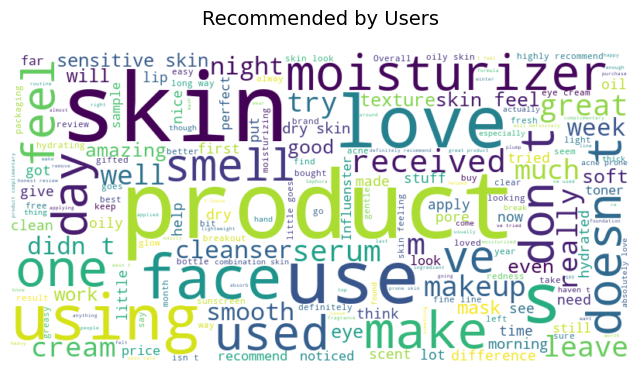

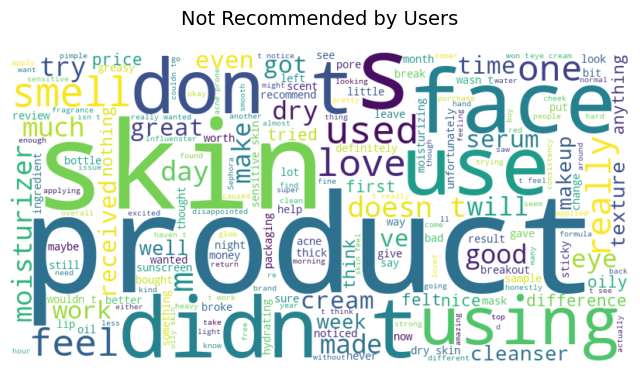

In [11]:
# Creating a function to generate a word cloud
def generate_word_cloud(dataframe, title):
    text = ' '.join(dataframe['review_text'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white',stopwords=STOPWORDS).generate(text)
    fig, ax = plt.subplots(figsize=(8, 16))
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.set_title(title, fontsize=14, pad=20)
    ax.axis("off")
    plt.show()

# Generate word cloud for all reviews
generate_word_cloud(data, 'All Recommendations')

# Generate word cloud for recommended reviews
recommended = data[data['is_recommended'] == 1]
generate_word_cloud(recommended, 'Recommended by Users')

# Generate word cloud for non-recommended reviews
not_recommended = data[data['is_recommended'] == 0]
generate_word_cloud(not_recommended, 'Not Recommended by Users')

From these wordcloud we can gain the following insight:

- For the wordcloud for all recommendation the top 5 words is (product, love, skin, use, and face). These words mean that Sephora's customer mostly talk about how they love the product and how the product is used for their skin and face.

- For the wordcloud for customer recommending the product, the top 5 words is (product, love, skin, use, and using). We can see that customer who recommend skincare products use positive words like love which emphasize how the customer like the product and also words like use and using to emphasize how they use the product because they like the product.

- For the wordcloud for customer not recommending the product, the top 5 words is (product, skin, didn't, face, and don't). We can see that customer that does not recommend sephora usually use negative words like didn't and don't which we could infer to them not using the product. other than that, customer also use past tense word such as used which could infer that they no longer use the product due to them not recommending the product.

With this insight we can see that there are differences between words used in positive and negative recommendations. Positive recommendation tend to use positive words such as love and present tense like use while negative recommendation tend to use negative word such as dont and didnt. While also using past tense like used.

### iv.2. Customers Recommendation Throught the Year

In [12]:
# Changing the submission time data type to datetime
data['submission_time'] = pd.to_datetime(data['submission_time'])

# Extract and making a new column for submission year
data['submission_year']= data['submission_time'].dt.year

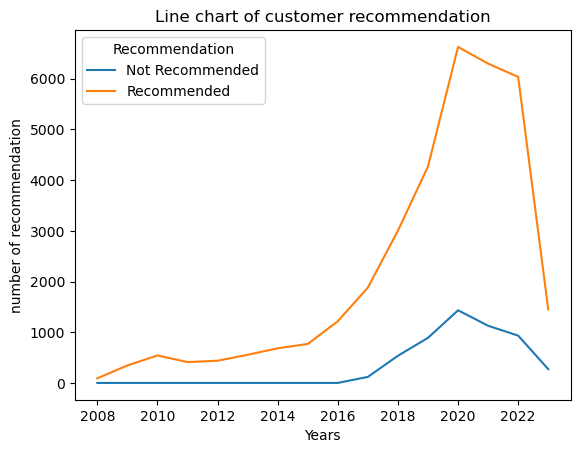

In [13]:
# Calculating the amount of customer recommendation per year
Count = data.groupby(['submission_year', 'is_recommended']).size().unstack(fill_value=0)

# Creating a line plot for customer recommendation
Count.plot(kind='line')
plt.title('Line chart of customer recommendation')
plt.xlabel('Years')
plt.ylabel('number of recommendation')
plt.legend(['Not Recommended', 'Recommended'], title='Recommendation')


From the following line chart we can gain the following insight

- The number of recommendation from customers is significantly higher compared to non-recommendation throught the year 2017 to 2023.

- Both recommendation and non-recommendation have the same trend peaking at 2020 and declining afterward. The main difference is the increase and decrease from recommendation is signficantly steeper than non-recommendation.

With this insight we can see that both recommendation and non-recommendation peaked at the year 2020 before declining. This might happen due to the pandemic leading people to buy less sephora product leading to the decline of recommendation and non-recommendation number.

### iv.3. Sephora's Customers Characteristics

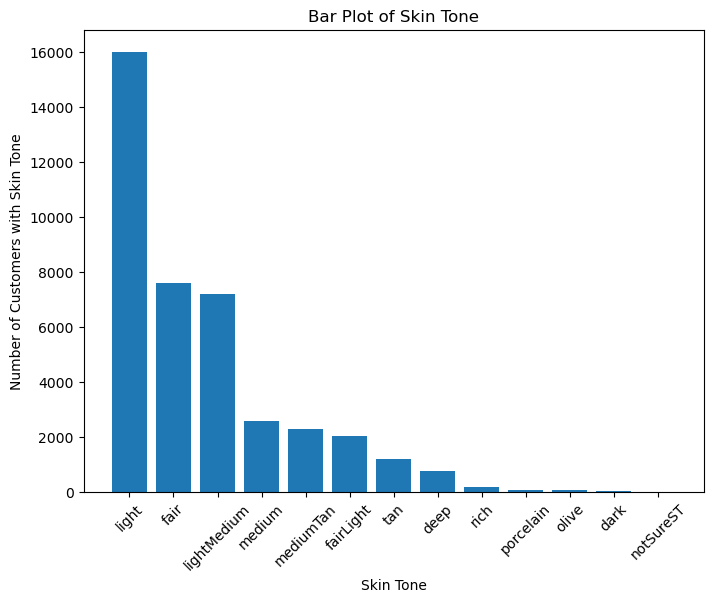

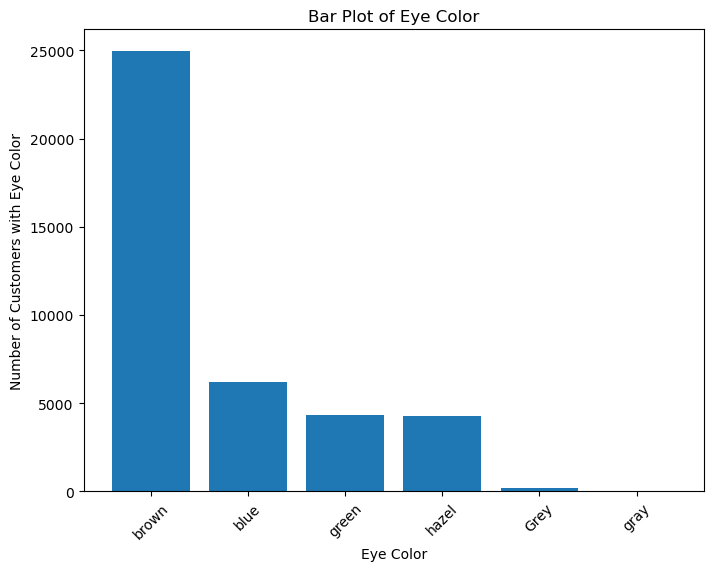

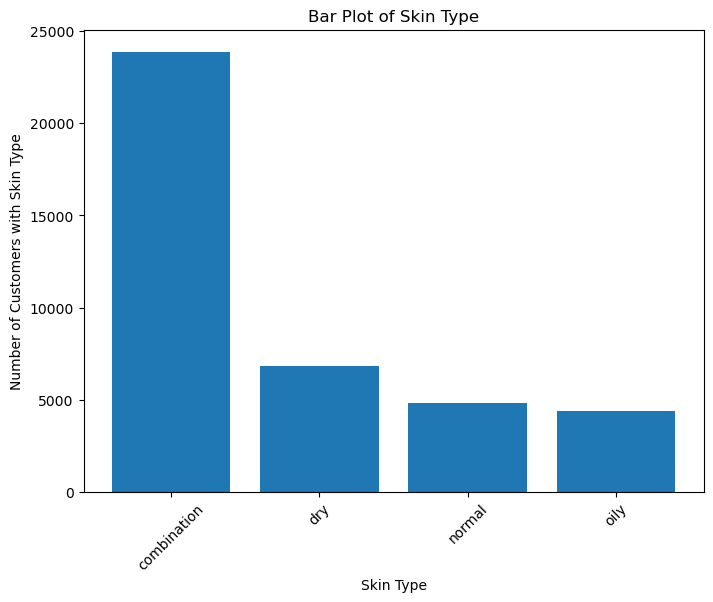

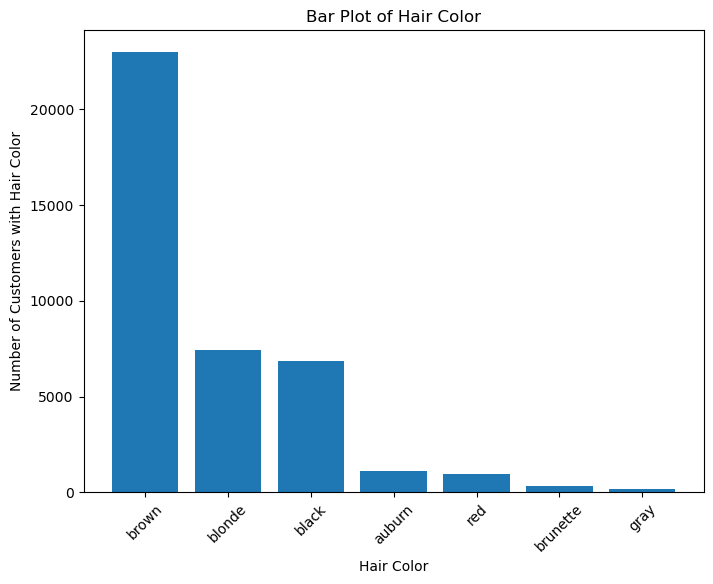

In [14]:
# Create a function to make a bar chart for customer characteristics
def customer_bar_chart(column_name, data):
    count_data = data[column_name].value_counts()

    plt.figure(figsize=(8, 6))
    plt.bar(count_data.index, count_data)
    plt.xlabel(column_name.replace('_', ' ').title())
    plt.ylabel(f'Number of Customers with {column_name.replace("_", " ").title()}')
    plt.title(f'Bar Plot of {column_name.replace("_", " ").title()}')
    plt.xticks(rotation=45)
    plt.show()

# Create a bar chart for skin tone
customer_bar_chart('skin_tone', data)

# Create a bar chart for eye_color
customer_bar_chart('eye_color', data)

# Create a bar chart for skin type
customer_bar_chart('skin_type', data)

# Create a bar chart for hair color
customer_bar_chart('hair_color', data)

From these bar charts we can see the following insight from characteristics of customers.

- From the skin tone we can see that the skin tone light is the most common while dark is the least common apart from not sure. From the bar chart we can see that there are a diverse range of 12 skin tone in the dataset although a major amount of data is centered around light, fair, and light-medium.

- From the eye color we can see that the most common eye color is brown while the least common eye color is gray or grey. We can see that the data is diverse with 5 eye color with a majority of the data centered around brown with more than 25.000 data.

- From the skin type we can see that the skin type of combination while the skin type oily is the least common although barely. We can see the data have 4 skin type with a majority of the data centered around combination skin type.

- From the hair color we can see that the most common hair color is brown with gray being the least common. We can see that the data is varied with 7 hair color with a majority of the data having brown, blonde, and black hair color.

With this insight we can infer that the most common characteristics from customers is a customer with light skin having a brown hair and eyes and having a combination of dry and oily skin. This could happen due to perhaps our marketing targeted these characteristics more compared to other type of characteristics. 

### iv.4. Top 10 Cheapest and Most Expensive Products

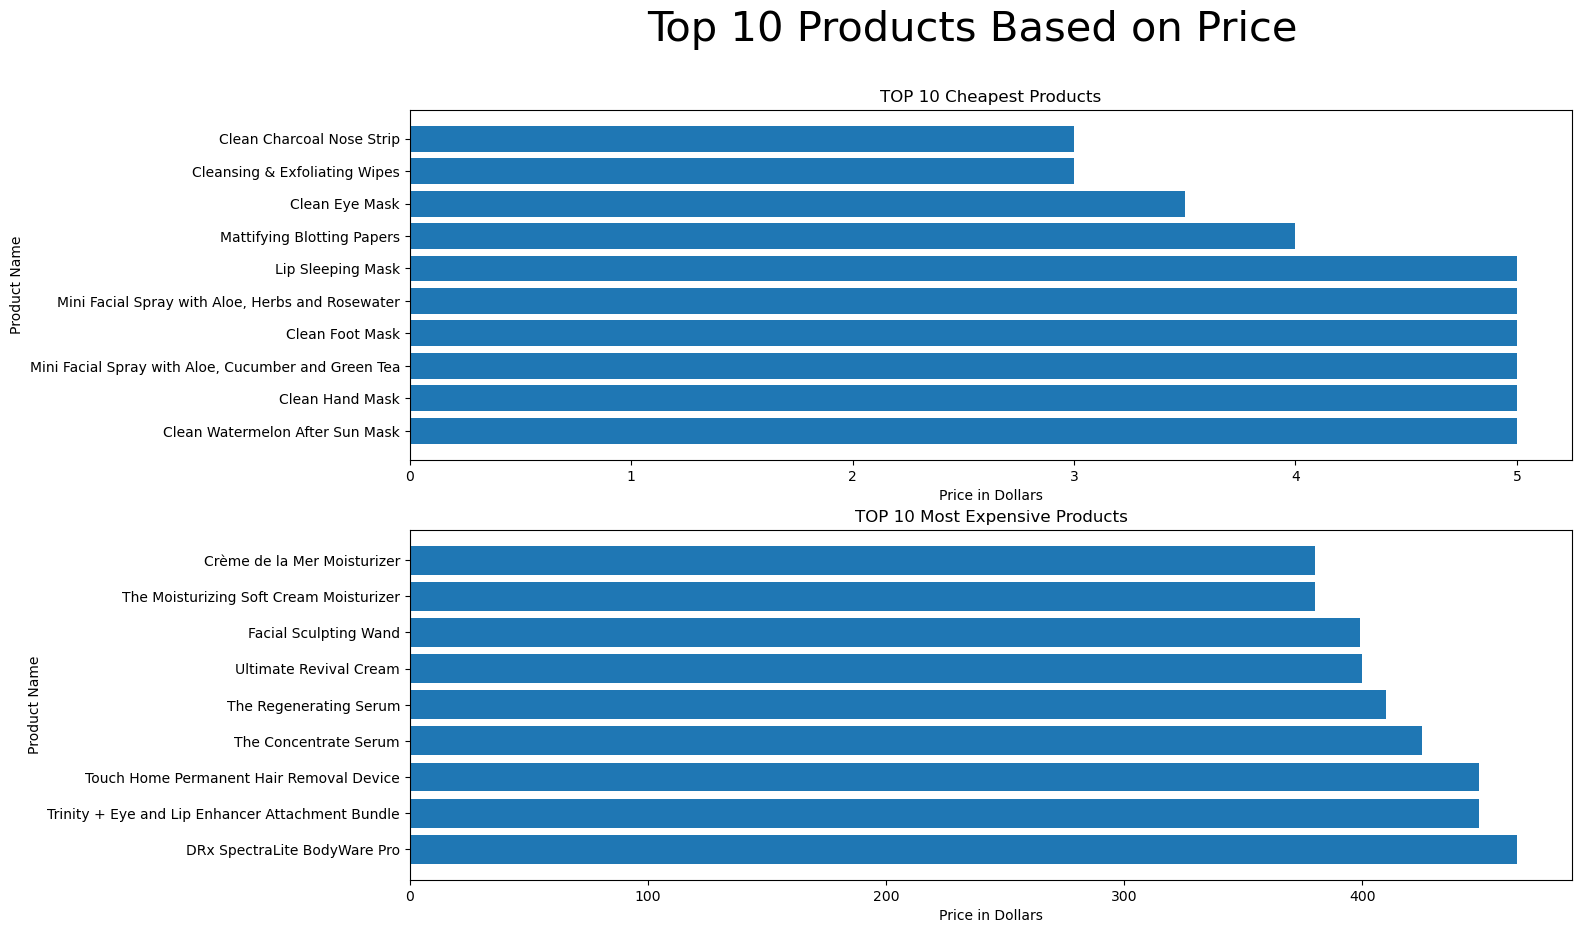

In [15]:
# Aggregate and sort data for the most cheap products
cheap = data.groupby(['product_name', 'price_usd']).sum(numeric_only=True).reset_index().sort_values('price_usd', ascending=True).head(10).sort_values('price_usd', ascending=False)

# Aggregate and sort data for the cheapest products
expensive = data.groupby(['product_name', 'price_usd']).sum(numeric_only=True).reset_index().sort_values('price_usd', ascending=False).head(10)

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

# Plot the most expensive products
ax1.barh(cheap['product_name'], cheap['price_usd'])
ax1.set_title("TOP 10 Cheapest Products")
ax1.set_xlabel("Price in Dollars")
ax1.set_ylabel("Product Name")

# Plot the cheapest products
ax2.barh(expensive['product_name'], expensive['price_usd'])
ax2.set_title("TOP 10 Most Expensive Products")
ax2.set_xlabel("Price in Dollars")
ax2.set_ylabel("Product Name")

# Set the overall title for the figure
plt.suptitle("Top 10 Products Based on Price", fontsize=30)

# Show the plot
plt.show()

From the vertical bar chart we can gain the following insight.

- From the top 10 cheapest price, we can see that the price in dollar ranges from 3 to 5 dollars. These products mostly consist of common skincare items like masks, tea, wipes, and papers. The cheapest product according to the product price consists of cleansing & exfoliating wipes and clean charcoal nose strip.

- From the top 10 most expensive price, we can see that the price in dollar range from around 360 to 460 dollars. These product mostly consists of fancier skincare product like moisturizers, wands, serums, and even electronic devices for skincare. The most expensive product according to the product price is the DRx SpectraLite BodyWare Pro.

With this insight we can see that the skincare products at Sephora has clearly been seperated into two categories, more affordable products like mask, tea, and wipes which is around 3 to 5 dollars and more expensive skincare options such as moisturizer and electronic device for skincare ranging from 360 to 460 dollars. These two categories can be used in order to cater marketing campaign to certain customer demographic.

### iv.5. Distribution of Products that Has Been Marked as Favorite

In [16]:
# Function to remove outliers
def remove_outliers(data, lower_quantile=0.25, upper_quantile=0.75):
    lower_bound = np.quantile(data, lower_quantile)
    upper_bound = np.quantile(data, upper_quantile)
    cleaned_data = data[(data >= lower_bound) & (data <= upper_bound)]
    return cleaned_data

cleaned_data = remove_outliers(data['loves_count'], lower_quantile=0.25, upper_quantile=0.75)

In [17]:
# Calculating the quantile of love count
min_value = cleaned_data.min()
q1d = cleaned_data.quantile(0.25)
q2d = cleaned_data.quantile(0.5)
q3d = cleaned_data.quantile(0.75)
max_value = cleaned_data.max()

iqr = q3d - q1d

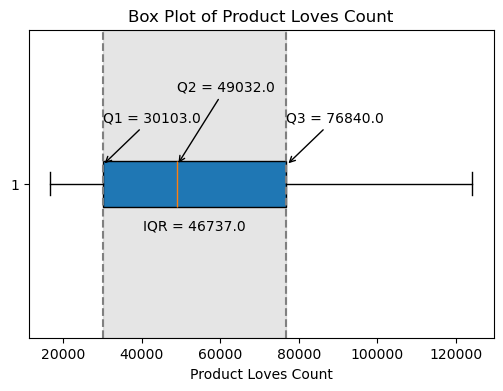

In [18]:
# Creating the box plot 
plt.figure(figsize=(6, 4))
plt.boxplot(cleaned_data, vert=False, patch_artist=True)

plt.annotate(f'Q1 = {q1d}', xy=(q1d, 1.06), xytext=(q1d, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q2 = {q2d}', xy=(q2d, 1.06), xytext=(q2d, 1.3), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q3 = {q3d}', xy=(q3d, 1.06), xytext=(q3d, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'IQR = {iqr}', xy=((q1d+q3d)/2, 0.85), ha='center')

plt.axvline(q1d, linestyle='--', color='gray', label='Q1')
plt.axvline(q3d, linestyle='--', color='gray', label='Q3')
plt.axvspan(q1d, q3d, alpha=0.2, color='gray', label='IQR')

plt.xlabel('Product Loves Count')
plt.title('Box Plot of Product Loves Count')

plt.show()

Based on the box plot we can get the following insights:

- From the iqr we can see there are a significant spread of product being favorited (love count) with a spread From Q1 and Q3 of 46,737 love count.

- From the Q1 we can see that 25% of the favorited product have a love count of 30,103.

- From the Q2 we can see that 50% of the favorited product have a love count of 49,032.

- From the Q3 we can see that 75% of the favorited product have a love count of 76,840.

- From the whiskers we can see that the love count is positively skewed meaning that most of the products have lower love count.

With this insight we can see that there was significant spread of products being favorited with most of the product having a love count of 30.103 to 76.840 with most of the product mostly having a lower love count. From this we can infer that we need to increase the amount of product being favorited by finding out products that score high in love count and what makes these product being more favorited than other products

In [19]:
# saving the changed EDA file to a new csv
data.to_csv('Data HG.csv', index=False)